# Personality classification

## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt

Dataset URL: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt
License(s): other
100%|███████████████████████████████████████| 1.86M/1.86M [00:02<00:00, 860kB/s]
100%|███████████████████████████████████████| 1.86M/1.86M [00:02<00:00, 819kB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Personality classification/60k-responses-of-16-personalities-test-mbt.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Personality classification')
zip_ref.close()

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("16P.csv", encoding='ISO-8859-1')

In [8]:
df.head(5)

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [9]:
df.shape

(59999, 62)

In [10]:
df.size

3719938

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Response Id,59999.0,29999.000000,17320.363738,0.0,14999.5,29999.0,44998.5,59998.0
You regularly make new friends.,59999.0,-0.000867,0.365701,-2.0,0.0,0.0,0.0,1.0
You spend a lot of your free time exploring various random topics that pique your interest,59999.0,-0.000467,0.364652,-1.0,0.0,0.0,0.0,1.0
Seeing other people cry can easily make you feel like you want to cry too,59999.0,0.000267,1.527343,-3.0,-1.0,0.0,1.0,3.0
You often make a backup plan for a backup plan.,59999.0,-0.232887,1.502173,-3.0,-1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...
You complete things methodically without skipping over any steps.,59999.0,-0.000533,0.364606,-1.0,0.0,0.0,0.0,1.0
You are very intrigued by things labeled as controversial.,59999.0,0.000667,0.368426,-2.0,0.0,0.0,0.0,1.0
You would pass along a good opportunity if you thought someone else needed it more.,59999.0,0.125152,1.515761,-3.0,-1.0,0.0,1.0,3.0
You struggle with deadlines.,59999.0,0.001983,1.524584,-3.0,-1.0,0.0,1.0,3.0


In [13]:
df.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

Response Id                                                                                   59999
You regularly make new friends.                                                                   4
You spend a lot of your free time exploring various random topics that pique your interest        3
Seeing other people cry can easily make you feel like you want to cry too                         7
You often make a backup plan for a backup plan.                                                   7
                                                                                              ...  
You are very intrigued by things labeled as controversial.                                        4
You would pass along a good opportunity if you thought someone else needed it more.               7
You struggle with deadlines.                                                                      7
You feel confident that things will work out for you.                                             7


In [17]:
df['Personality'].unique()

array(['ENFP', 'ISFP', 'INFJ', 'ISTP', 'ENFJ', 'INTJ', 'ENTJ', 'ESFP',
       'INFP', 'INTP', 'ISTJ', 'ENTP', 'ISFJ', 'ESTJ', 'ESTP', 'ESFJ'],
      dtype=object)

In [18]:
df['Personality'].value_counts()

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ESFJ    3746
ISFP    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64

## Data Preprocessing

In [19]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Personality'] = le.fit_transform(df['Personality'])

In [21]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [22]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [25]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9088333333333334, 0.8895, 0.97675, 0.97425, 0.3954166666666667, 0.9450833333333334, 0.8845833333333334, 0.6416666666666667, 0.0605]


## Model Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       739
           1       0.93      0.94      0.94       773
           2       0.93      0.96      0.94       738
           3       0.94      0.95      0.94       748
           4       0.86      0.83      0.84       770
           5       0.94      0.94      0.94       790
           6       0.93      0.93      0.93       739
           7       0.93      0.92      0.93       773
           8       0.91      0.91      0.91       775
           9       0.89      0.88      0.89       749
          10       0.88      0.90      0.89       699
          11       0.91      0.90      0.90       744
          12       0.88      0.89      0.88       753
          13       0.91      0.90      0.90       745
          14       0.88      0.91      0.89       740
          15       0.87      0.89      0.88       725

    accuracy                  

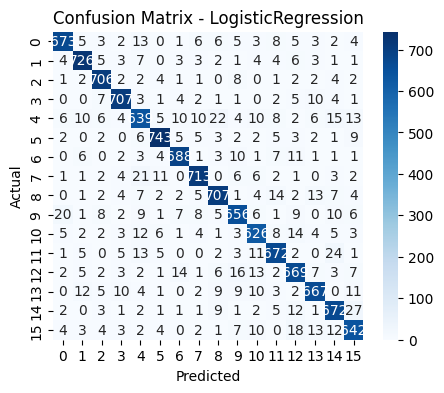

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       739
           1       0.89      0.92      0.91       773
           2       0.89      0.96      0.93       738
           3       0.90      0.95      0.93       748
           4       0.90      0.73      0.80       770
           5       0.89      0.95      0.92       790
           6       0.89      0.94      0.92       739
           7       0.89      0.94      0.92       773
           8       0.91      0.89      0.89       775
           9       0.90      0.87      0.88       749
          10       0.88      0.85      0.87       699
          11       0.83      0.91      0.87       744
          12       0.90      0.80      0.85       753
          13       0.91      0.85      0.88       745
          14       0.91      0.84      0.88       740
          15       0.84      0.92      0.88       725

    accuracy                     

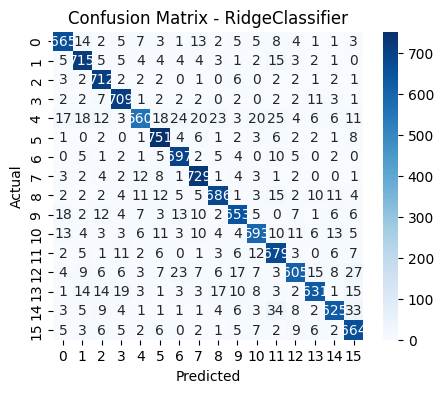

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.97      0.98      0.98       773
           2       0.98      0.99      0.98       738
           3       0.99      0.98      0.98       748
           4       0.98      0.97      0.97       770
           5       0.98      0.97      0.98       790
           6       0.98      0.97      0.98       739
           7       0.98      0.98      0.98       773
           8       0.98      0.97      0.97       775
           9       0.97      0.97      0.97       749
          10       0.97      0.98      0.98       699
          11       0.97      0.99      0.98       744
          12       0.98      0.98      0.98       753
          13       0.98      0.97      0.97       745
          14       0.97      0.98      0.98       740
          15       0.97      0.98      0.98       725

    accuracy                       

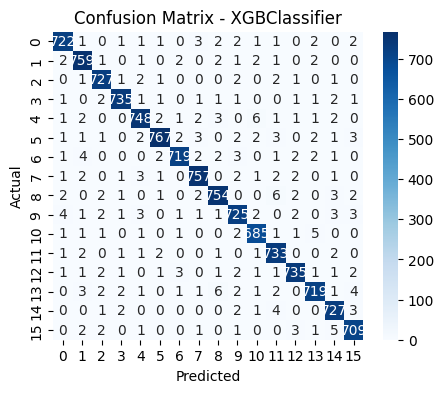

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.98      0.98      0.98       773
           2       0.98      0.98      0.98       738
           3       0.98      0.98      0.98       748
           4       0.97      0.97      0.97       770
           5       0.99      0.98      0.98       790
           6       0.98      0.98      0.98       739
           7       0.98      0.98      0.98       773
           8       0.97      0.97      0.97       775
           9       0.97      0.97      0.97       749
          10       0.98      0.97      0.97       699
          11       0.96      0.99      0.97       744
          12       0.98      0.97      0.97       753
          13       0.98      0.97      0.98       745
          14       0.97      0.97      0.97       740
          15       0.98      0.98      0.98       725

    accuracy              

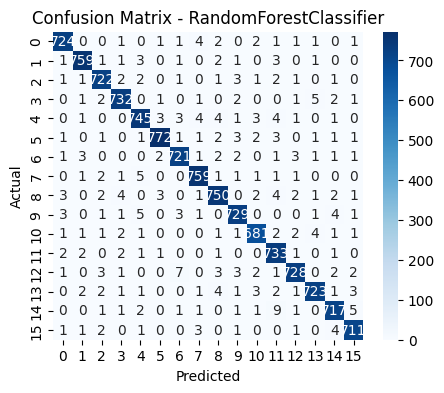

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43       739
           1       0.42      0.48      0.45       773
           2       0.55      0.18      0.27       738
           3       0.48      0.38      0.42       748
           4       0.36      0.32      0.34       770
           5       0.43      0.27      0.33       790
           6       0.40      0.60      0.48       739
           7       0.47      0.59      0.52       773
           8       0.46      0.32      0.38       775
           9       0.35      0.51      0.41       749
          10       0.27      0.57      0.36       699
          11       0.42      0.31      0.36       744
          12       0.45      0.16      0.23       753
          13       0.38      0.51      0.44       745
          14       0.35      0.47      0.40       740
          15       0.45      0.25      0.32       725

    accuracy                  

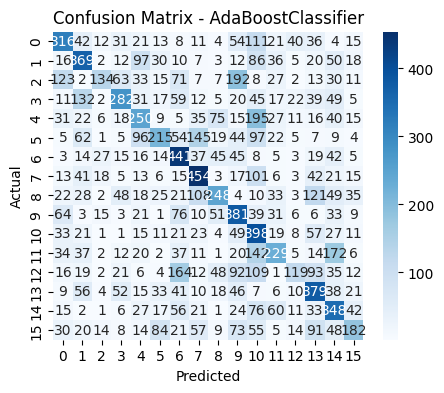

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       739
           1       0.95      0.97      0.96       773
           2       0.96      0.96      0.96       738
           3       0.97      0.96      0.97       748
           4       0.93      0.92      0.92       770
           5       0.96      0.96      0.96       790
           6       0.97      0.94      0.95       739
           7       0.97      0.95      0.96       773
           8       0.94      0.93      0.93       775
           9       0.93      0.94      0.94       749
          10       0.93      0.95      0.94       699
          11       0.92      0.96      0.94       744
          12       0.94      0.94      0.94       753
          13       0.96      0.92      0.94       745
          14       0.93      0.94      0.93       740
          15       0.92      0.95      0.94       725

    accuracy          

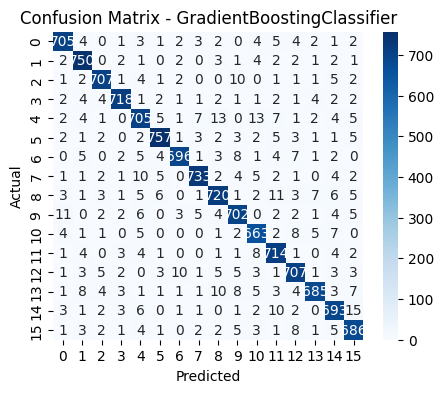

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       739
           1       0.88      0.92      0.90       773
           2       0.86      0.93      0.89       738
           3       0.88      0.90      0.89       748
           4       0.86      0.87      0.87       770
           5       0.88      0.89      0.89       790
           6       0.87      0.90      0.89       739
           7       0.89      0.90      0.89       773
           8       0.90      0.86      0.88       775
           9       0.89      0.88      0.88       749
          10       0.88      0.89      0.88       699
          11       0.89      0.88      0.89       744
          12       0.92      0.87      0.89       753
          13       0.92      0.84      0.88       745
          14       0.91      0.86      0.88       740
          15       0.92      0.85      0.88       725

    accuracy                   

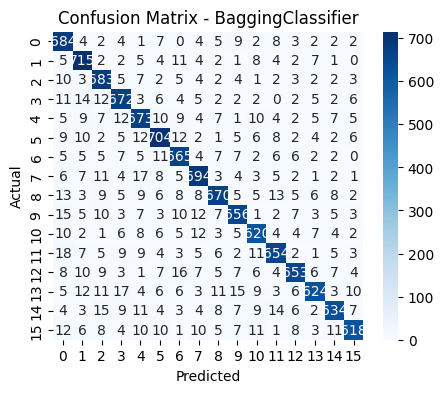

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66       739
           1       0.65      0.64      0.64       773
           2       0.65      0.69      0.67       738
           3       0.63      0.64      0.63       748
           4       0.63      0.63      0.63       770
           5       0.69      0.64      0.66       790
           6       0.62      0.60      0.61       739
           7       0.70      0.67      0.68       773
           8       0.63      0.61      0.62       775
           9       0.60      0.64      0.62       749
          10       0.63      0.67      0.65       699
          11       0.63      0.64      0.64       744
          12       0.63      0.63      0.63       753
          13       0.65      0.62      0.63       745
          14       0.62      0.64      0.63       740
          15       0.63      0.65      0.64       725

    accuracy              

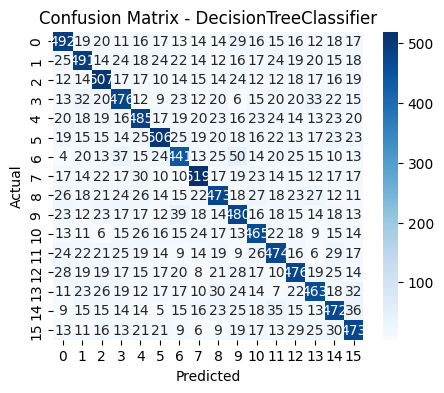

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       739
           1       0.00      0.00      0.00       773
           2       0.06      0.19      0.10       738
           3       0.00      0.00      0.00       748
           4       0.00      0.00      0.00       770
           5       0.00      0.00      0.00       790
           6       0.00      0.00      0.00       739
           7       0.00      0.00      0.00       773
           8       0.00      0.00      0.00       775
           9       0.00      0.00      0.00       749
          10       0.06      0.22      0.09       699
          11       0.00      0.00      0.00       744
          12       0.06      0.04      0.05       753
          13       0.00      0.00      0.00       745
          14       0.06      0.35      0.10       740
          15       0.06      0.20      0.09       725

    accuracy                           0.06  

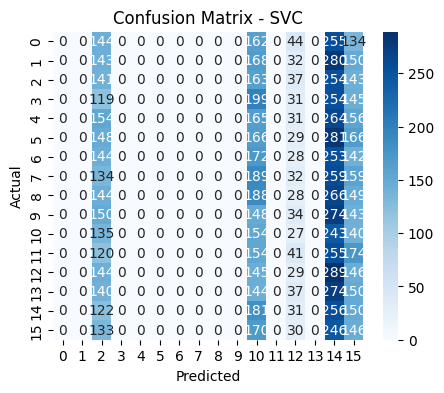

In [27]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()